### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [7]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- vw, volkswagen
- vokswagen, volkswagen
- porcshce, porsche
- toyouta, toyota
- maxda , mazda




In [8]:

df['CarName'] = df['CarName'].str.lower()
def replace_name(a,b):
    df.CarName.replace(a,b, inplace=True)
    

replace_name('vw', 'volkswagen')
replace_name('vokswagen', 'volkswagen')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('maxda', 'mazda')

In [9]:
df['CarName'] .unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: xlabel='symboling', ylabel='price'>

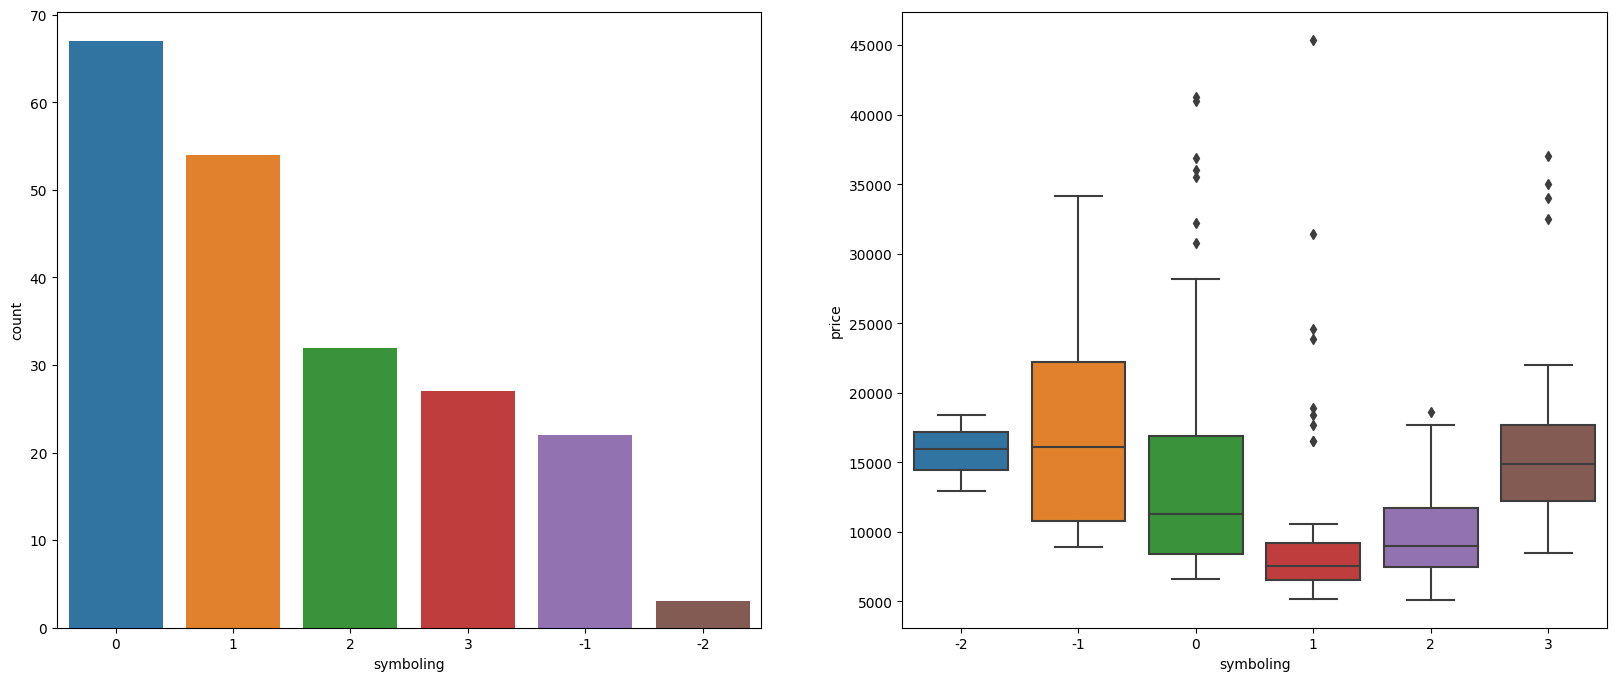

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'symboling', order=df['symboling'].value_counts(ascending=False).index)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'symboling', y = 'price')

# symboling data

- symboling of 0 seem to be sold the most and -2 seem to be sold the least
- symboling of -1 seem to have higher price range and 1 seems to have lower price range
- 3 seem to have similar price range with -1

In [12]:
df.groupby(['CarName'])['price'].mean().sort_values(ascending=False)

CarName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

[Text(0, 0, 'toyota'),
 Text(1, 0, 'nissan'),
 Text(2, 0, 'mazda'),
 Text(3, 0, 'mitsubishi'),
 Text(4, 0, 'honda'),
 Text(5, 0, 'volkswagen'),
 Text(6, 0, 'subaru'),
 Text(7, 0, 'peugeot'),
 Text(8, 0, 'volvo'),
 Text(9, 0, 'dodge'),
 Text(10, 0, 'buick'),
 Text(11, 0, 'bmw'),
 Text(12, 0, 'audi'),
 Text(13, 0, 'plymouth'),
 Text(14, 0, 'saab'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'isuzu'),
 Text(17, 0, 'jaguar'),
 Text(18, 0, 'chevrolet'),
 Text(19, 0, 'alfa-romero'),
 Text(20, 0, 'renault'),
 Text(21, 0, 'mercury')]

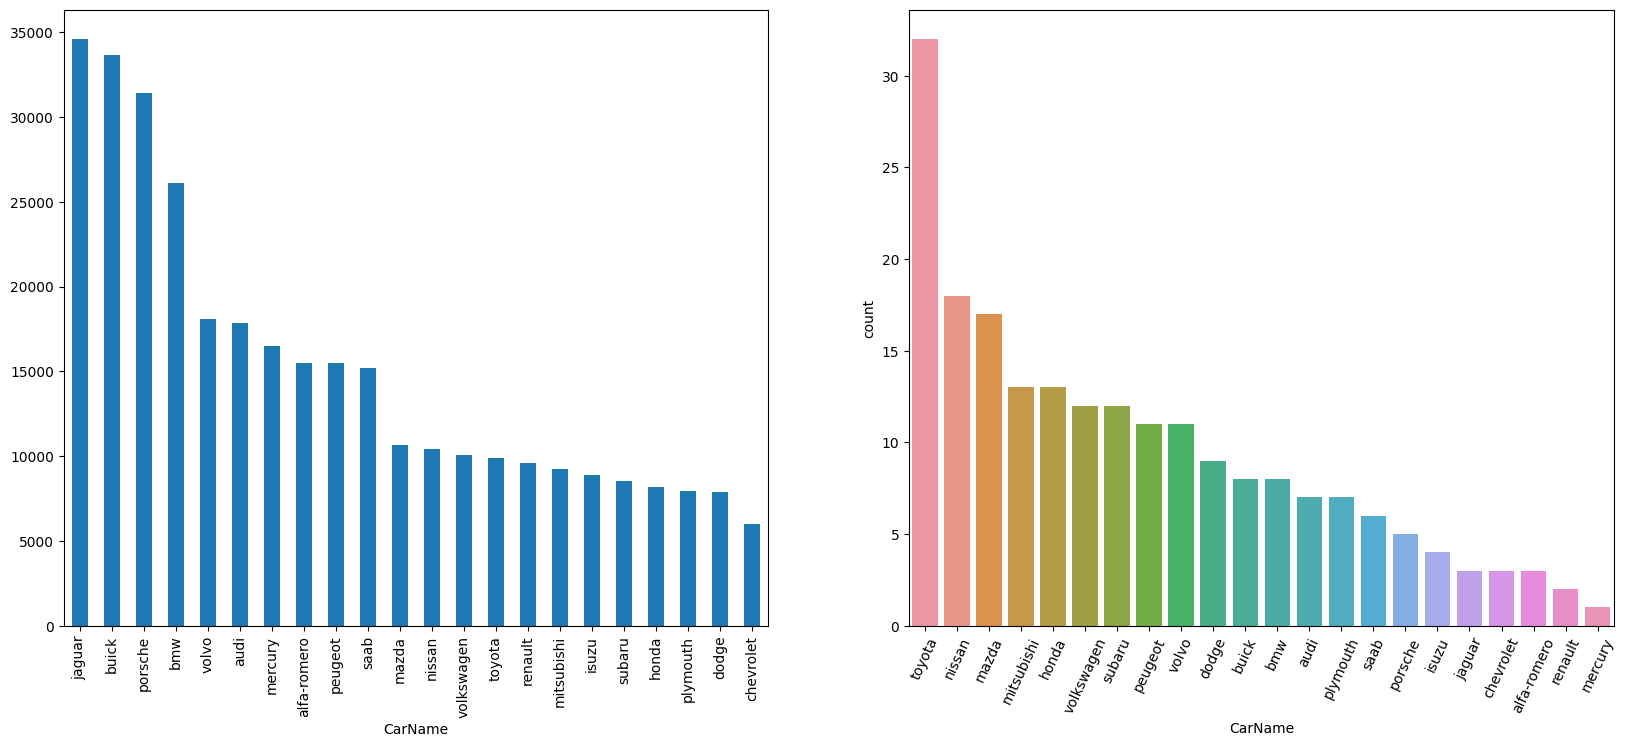

In [13]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df.groupby(['CarName'])['price'].mean().sort_values(ascending=False).plot.bar()

plt.subplot(1,2,2)
plt1 = sns.countplot(data = df, x = 'CarName', order = df['CarName'].value_counts(ascending=False).index)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation = 65)


# CarName with price
 
- jaguar, buick and porsche seem to have higher price than other cars.
- toyota, nissan, mazda seem to be preferred cars

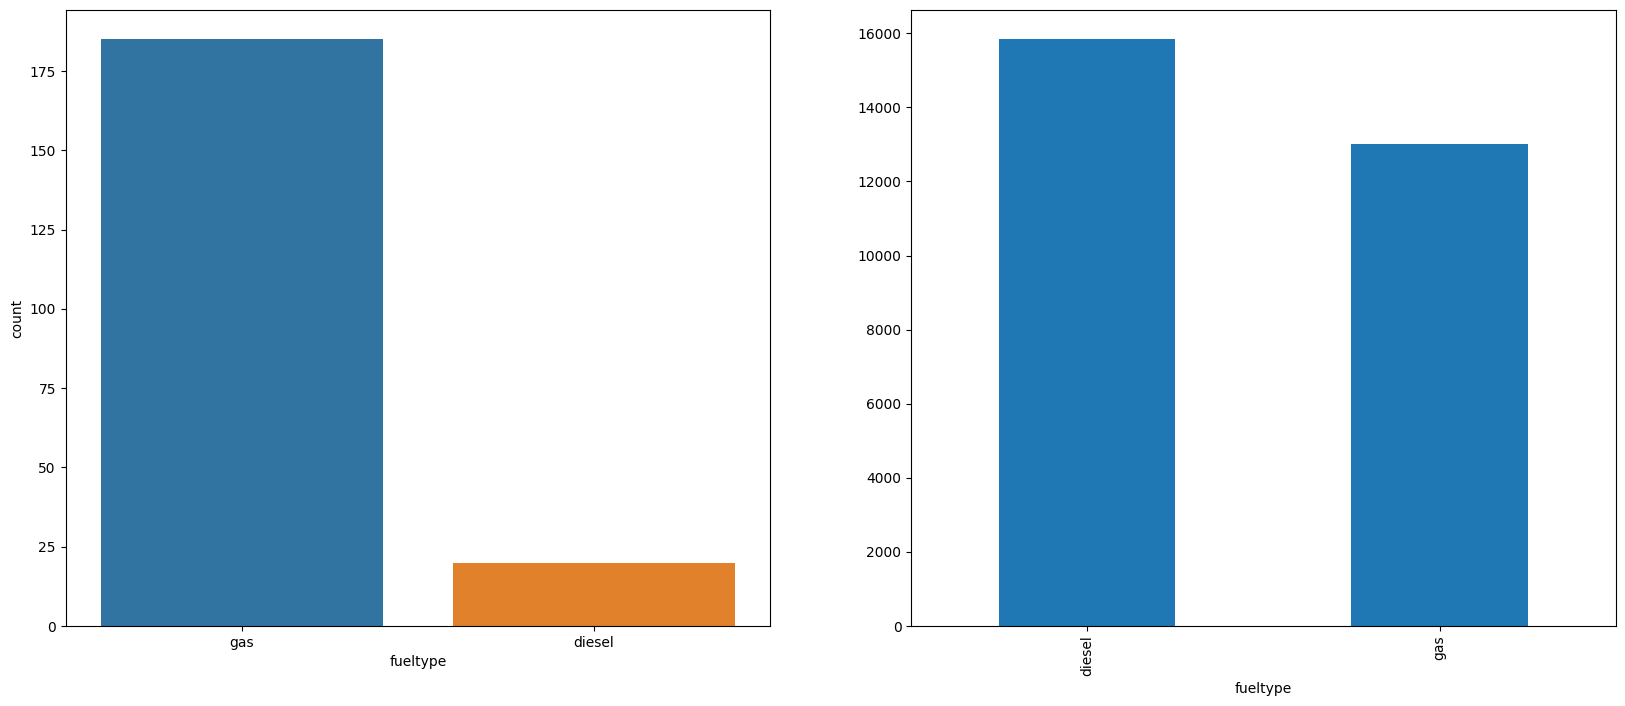

In [14]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'fueltype')

plt.subplot(1,2,2)
plt1 = df.groupby(['fueltype'])['price'].mean().plot.bar()


# Fuel type with price
- people seem to buy car of gas fuel type more and of diesel less 
- diesel fuel type car seem to have more price than gas fuel type car

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

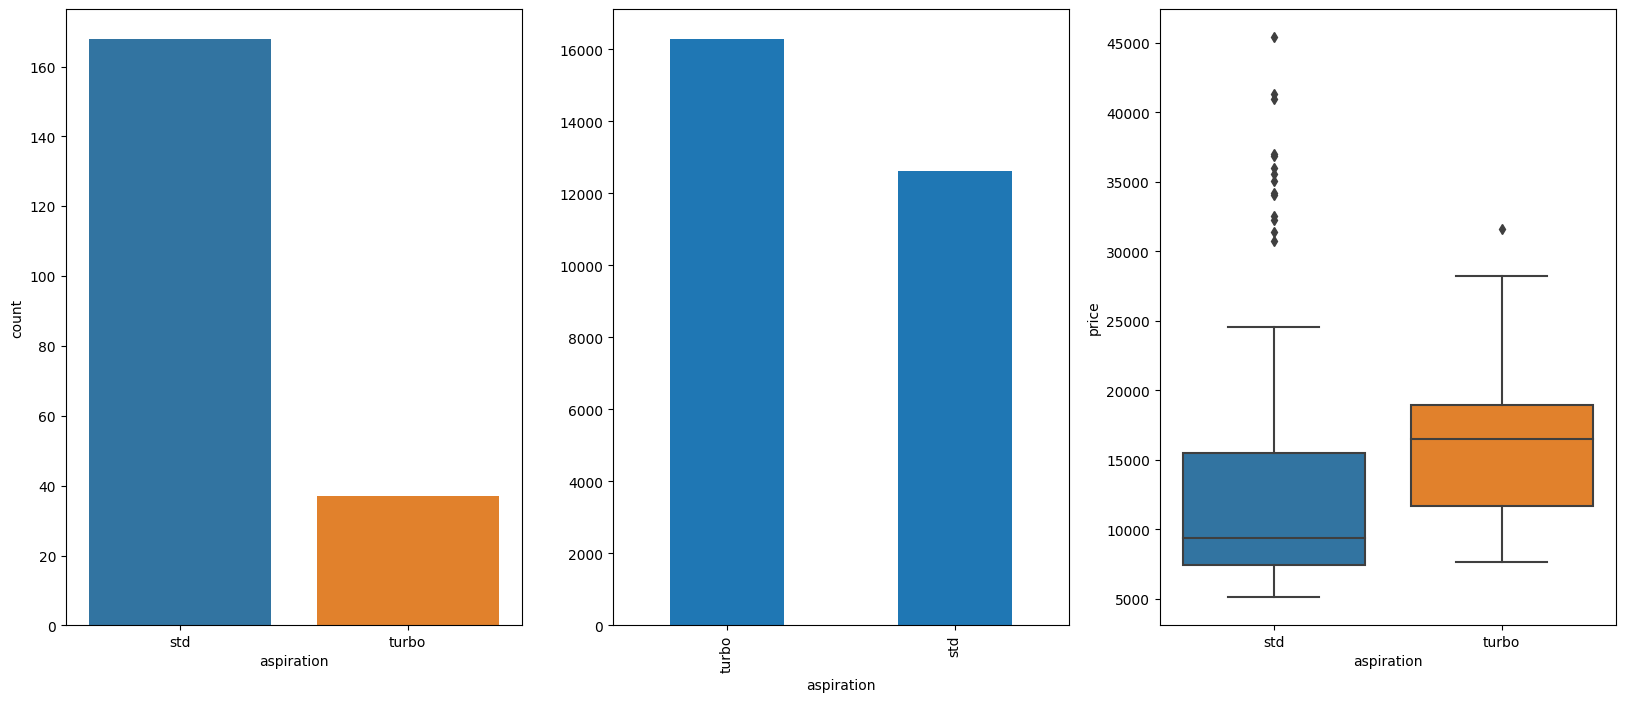

In [15]:
plt.figure(figsize = (20,8))
plt.subplot(1,3,1)
sns.countplot(data = df, x ='aspiration' )

plt.subplot(1,3,2)
plt1 = df.groupby(['aspiration'])['price'].mean().sort_values(ascending=False).plot.bar()

plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'aspiration', y = 'price')
plt

# aspiration and price
- people prefer std type and turbo less because of higher prce of turbo 


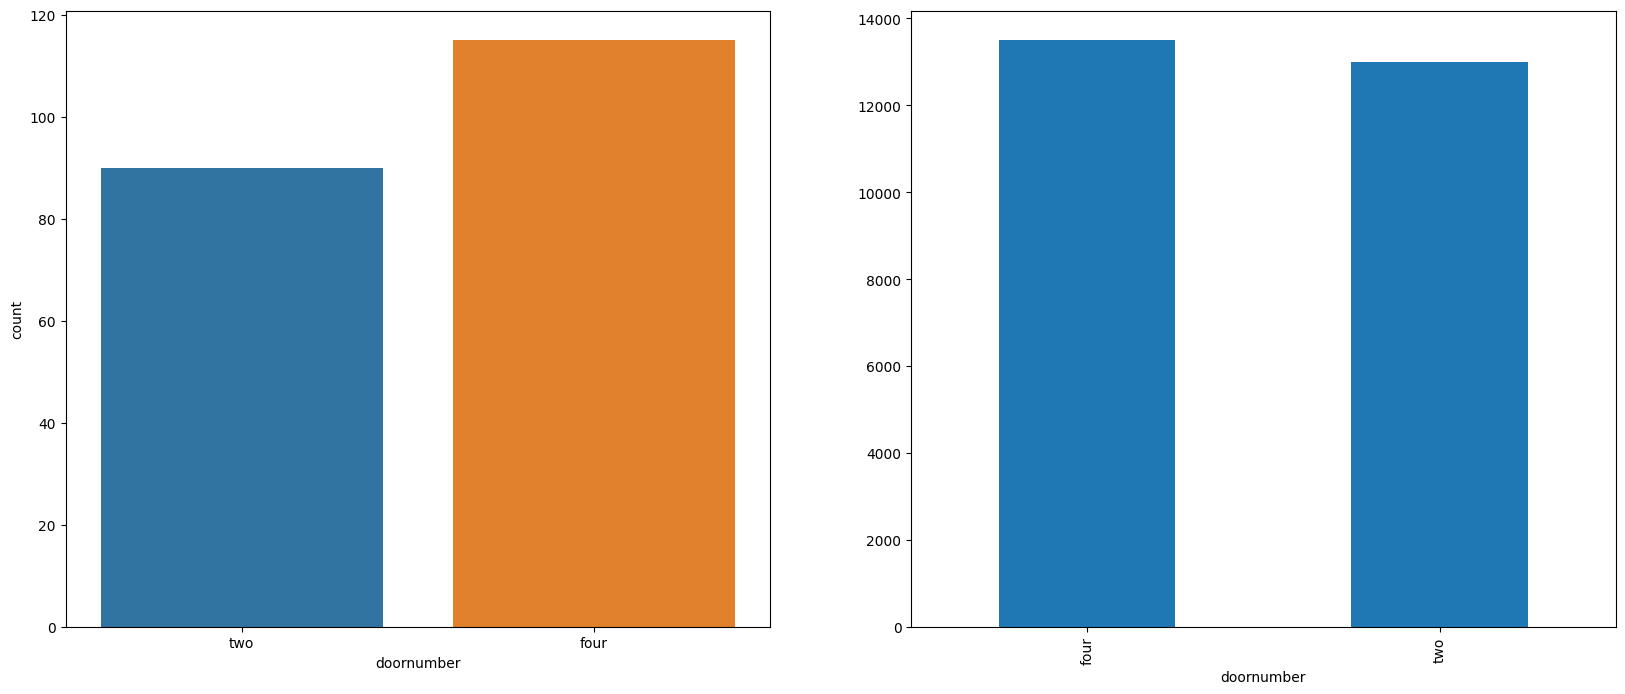

In [16]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'doornumber' )

plt.subplot(1,2,2)
plt1 = df.groupby(['doornumber'])['price'].mean().plot.bar()

# door number and price
- door number does not seem to affect price that much because of similar price range but people have brought car with four doors more 

<Axes: xlabel='carbody', ylabel='price'>

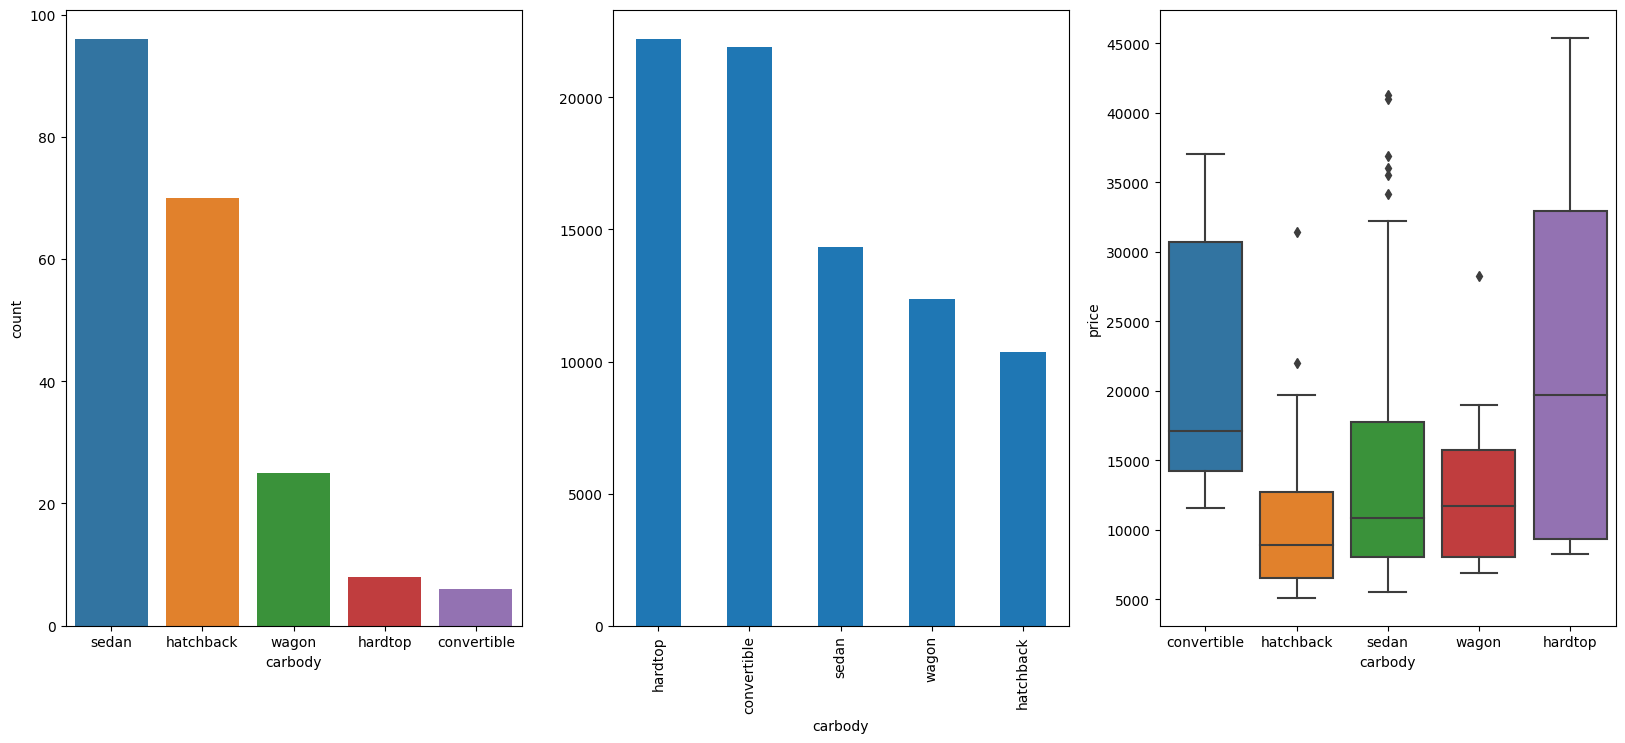

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.countplot(data =df, x = 'carbody', order = df['carbody'].value_counts(ascending=False).index)

plt.subplot(1,3,2)
plt1 = df.groupby(['carbody'])['price'].mean().sort_values(ascending=False).plot.bar()


plt.subplot(1,3,3)
sns.boxplot(data = df, x = 'carbody', y = 'price')

# Car Body
- sedan seem to be preferred car
- hardtop and convertible seem to have higher price than other cars

# drive wheel


<Axes: xlabel='drivewheel', ylabel='price'>

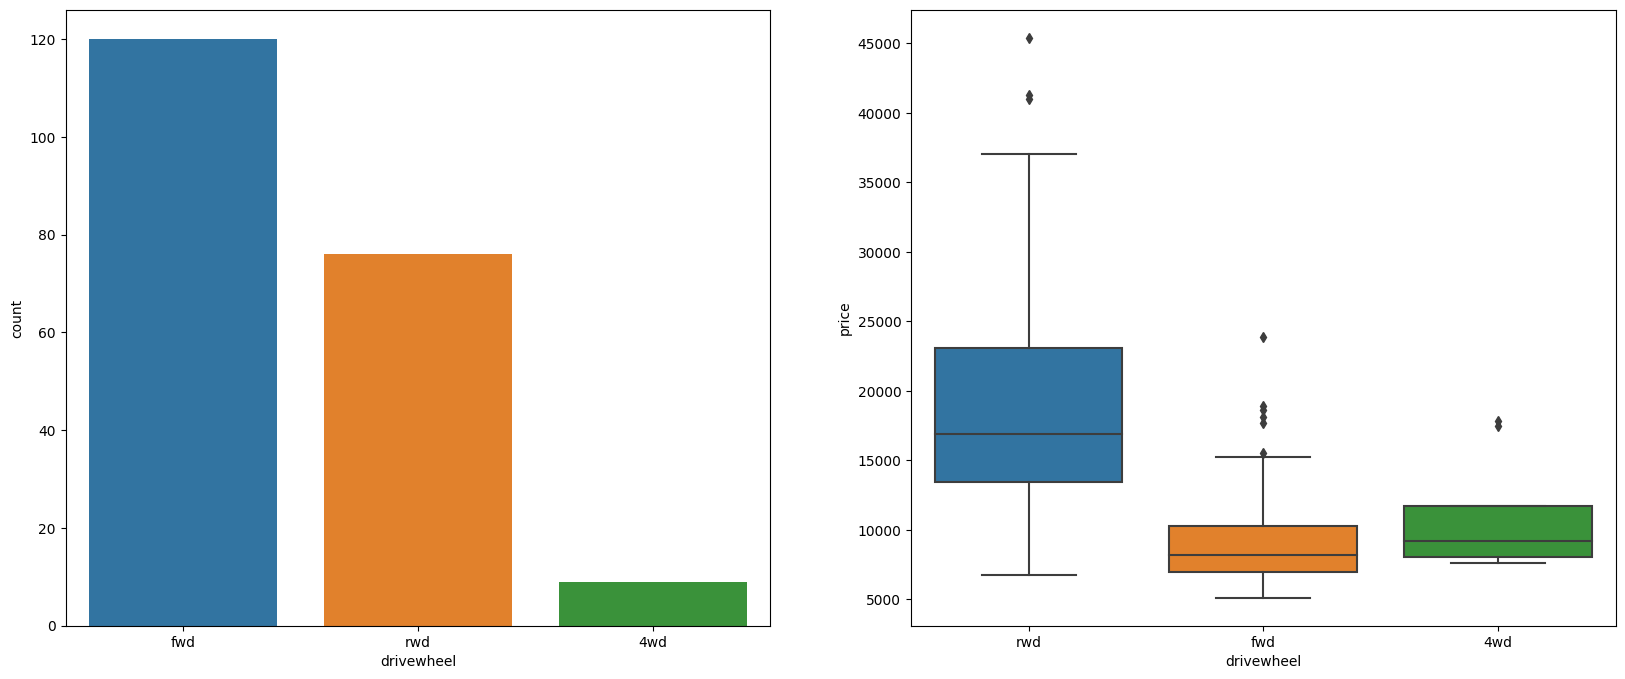

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'drivewheel', order = df['drivewheel'].value_counts(ascending=False).index)
plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'drivewheel', y = 'price')

- fwd seem to be most sold, 4wd seem to be least sold
- fwd is cheap rwd is expensive.

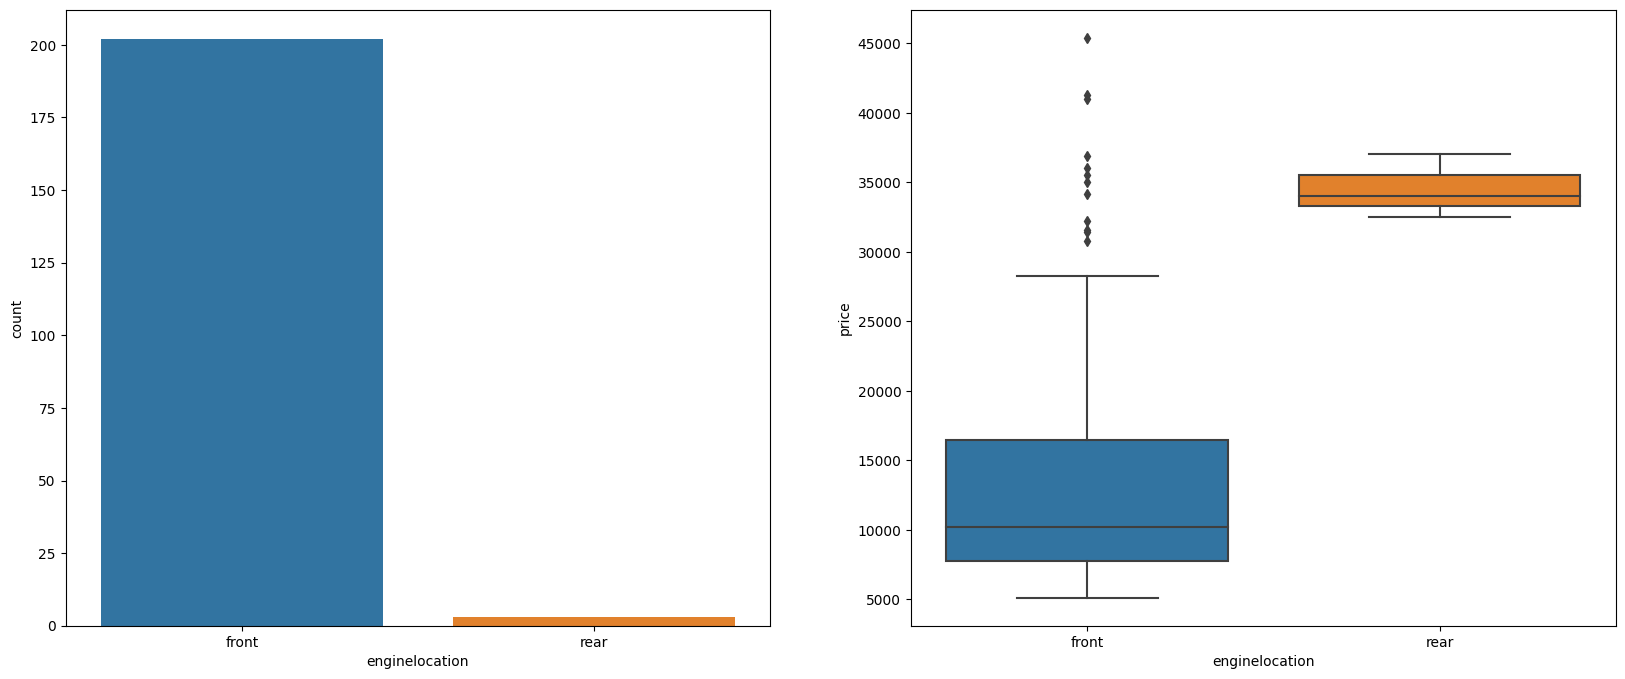

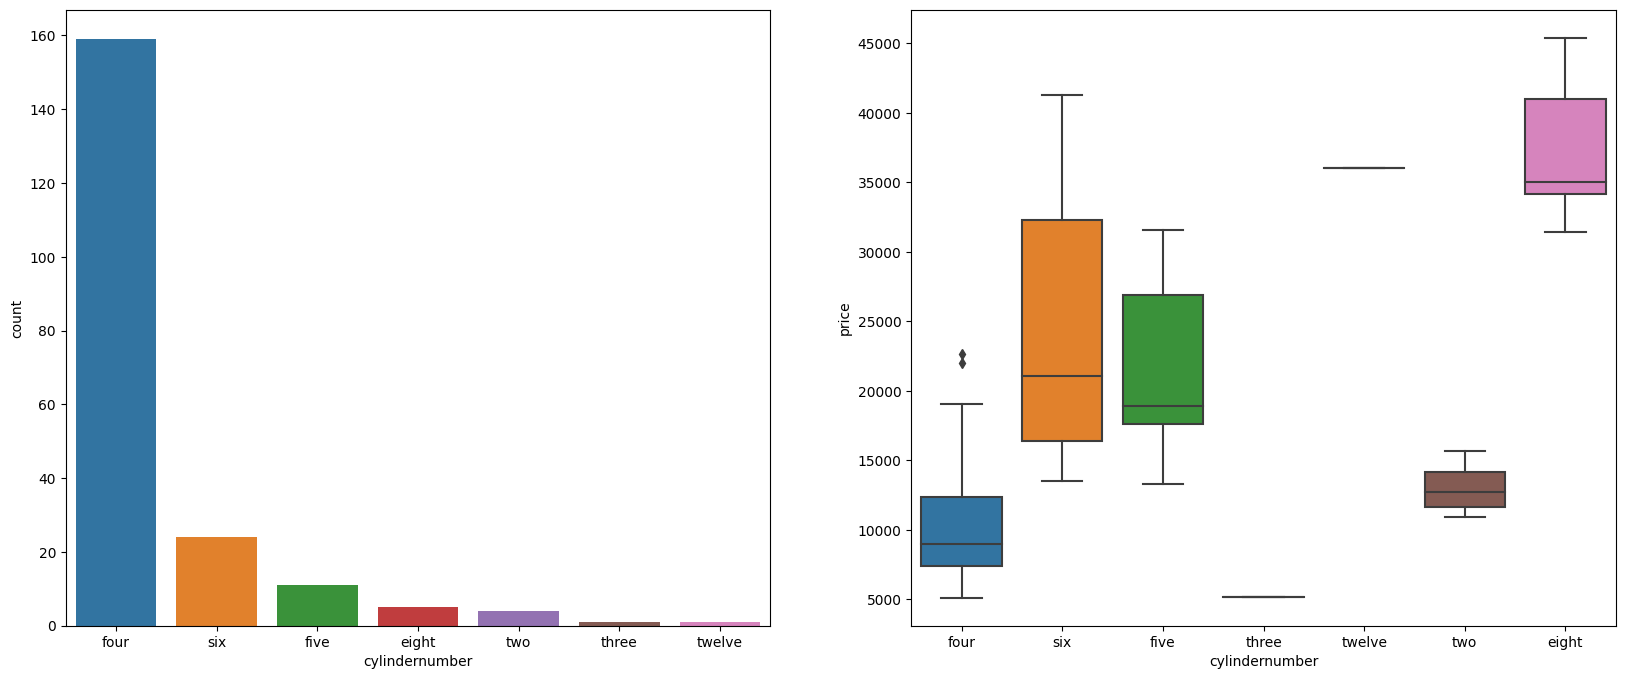

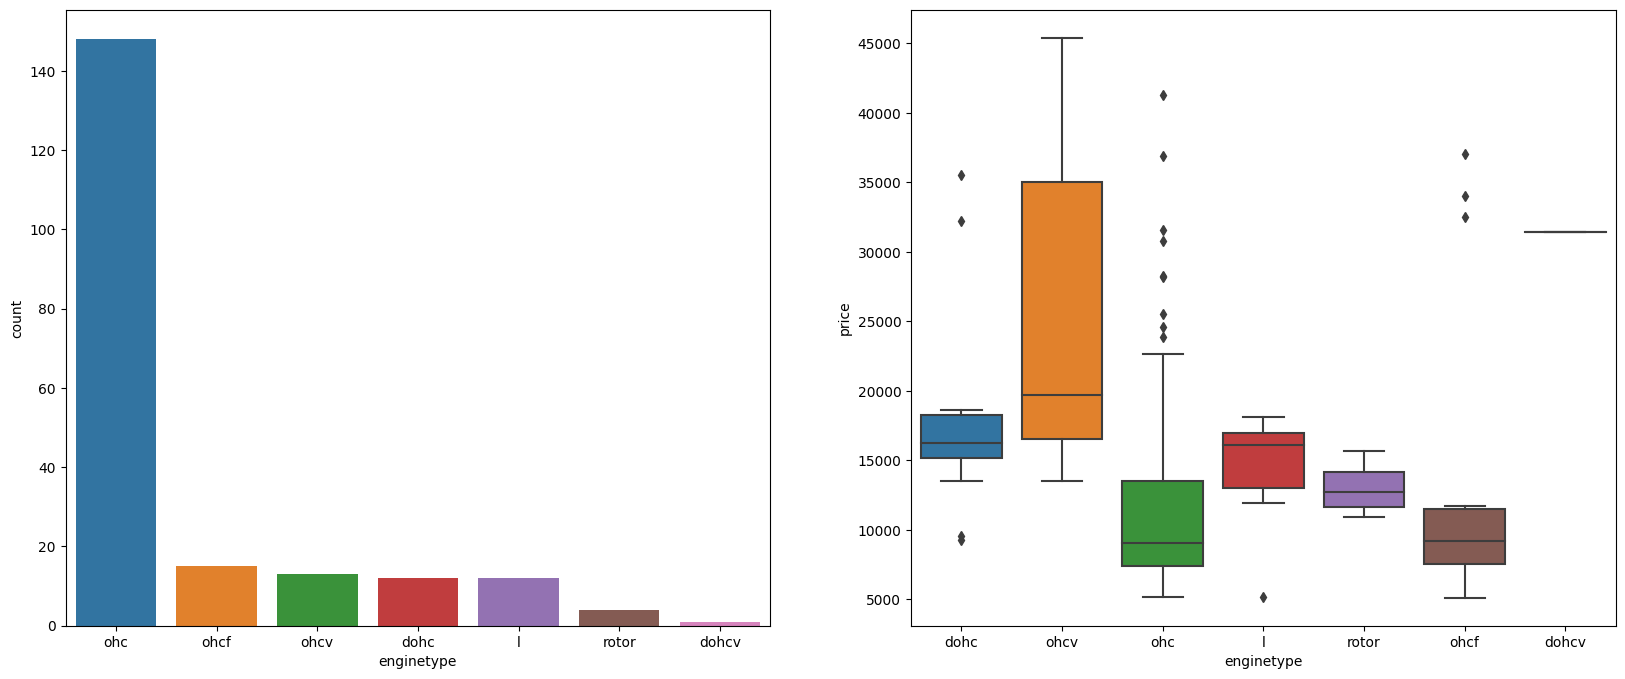

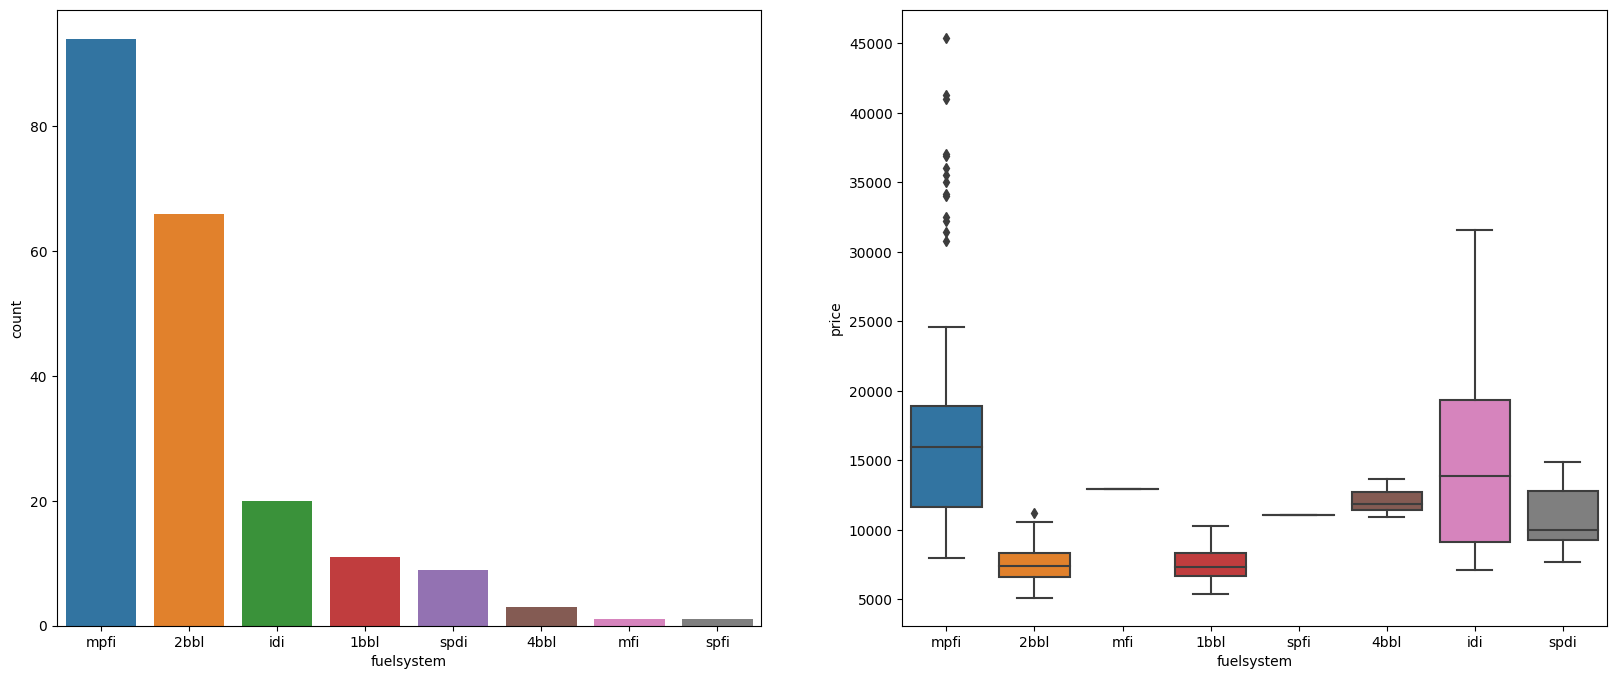

In [19]:
def plot_box_count(X, df):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = X, order = df[X].value_counts(ascending=False).index)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, x = X, y = 'price')
    




plot_box_count('enginelocation',df)
plot_box_count('cylindernumber',df)
plot_box_count('enginetype',df)
plot_box_count('fuelsystem',df)

In [20]:
df.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False)

fuelsystem
mpfi    17754.602840
idi     15838.150000
mfi     12964.000000
4bbl    12145.000000
spfi    11048.000000
spdi    10990.444444
1bbl     7555.545455
2bbl     7478.151515
Name: price, dtype: float64

# Understanding numerical columns

- wheelbase
- carlength
- carwidth
- carheight
- curbweight
- boreratio 
- stroke
- compressionratio 
- horsepower
- peakrpm 
- citympg
- highwaympg

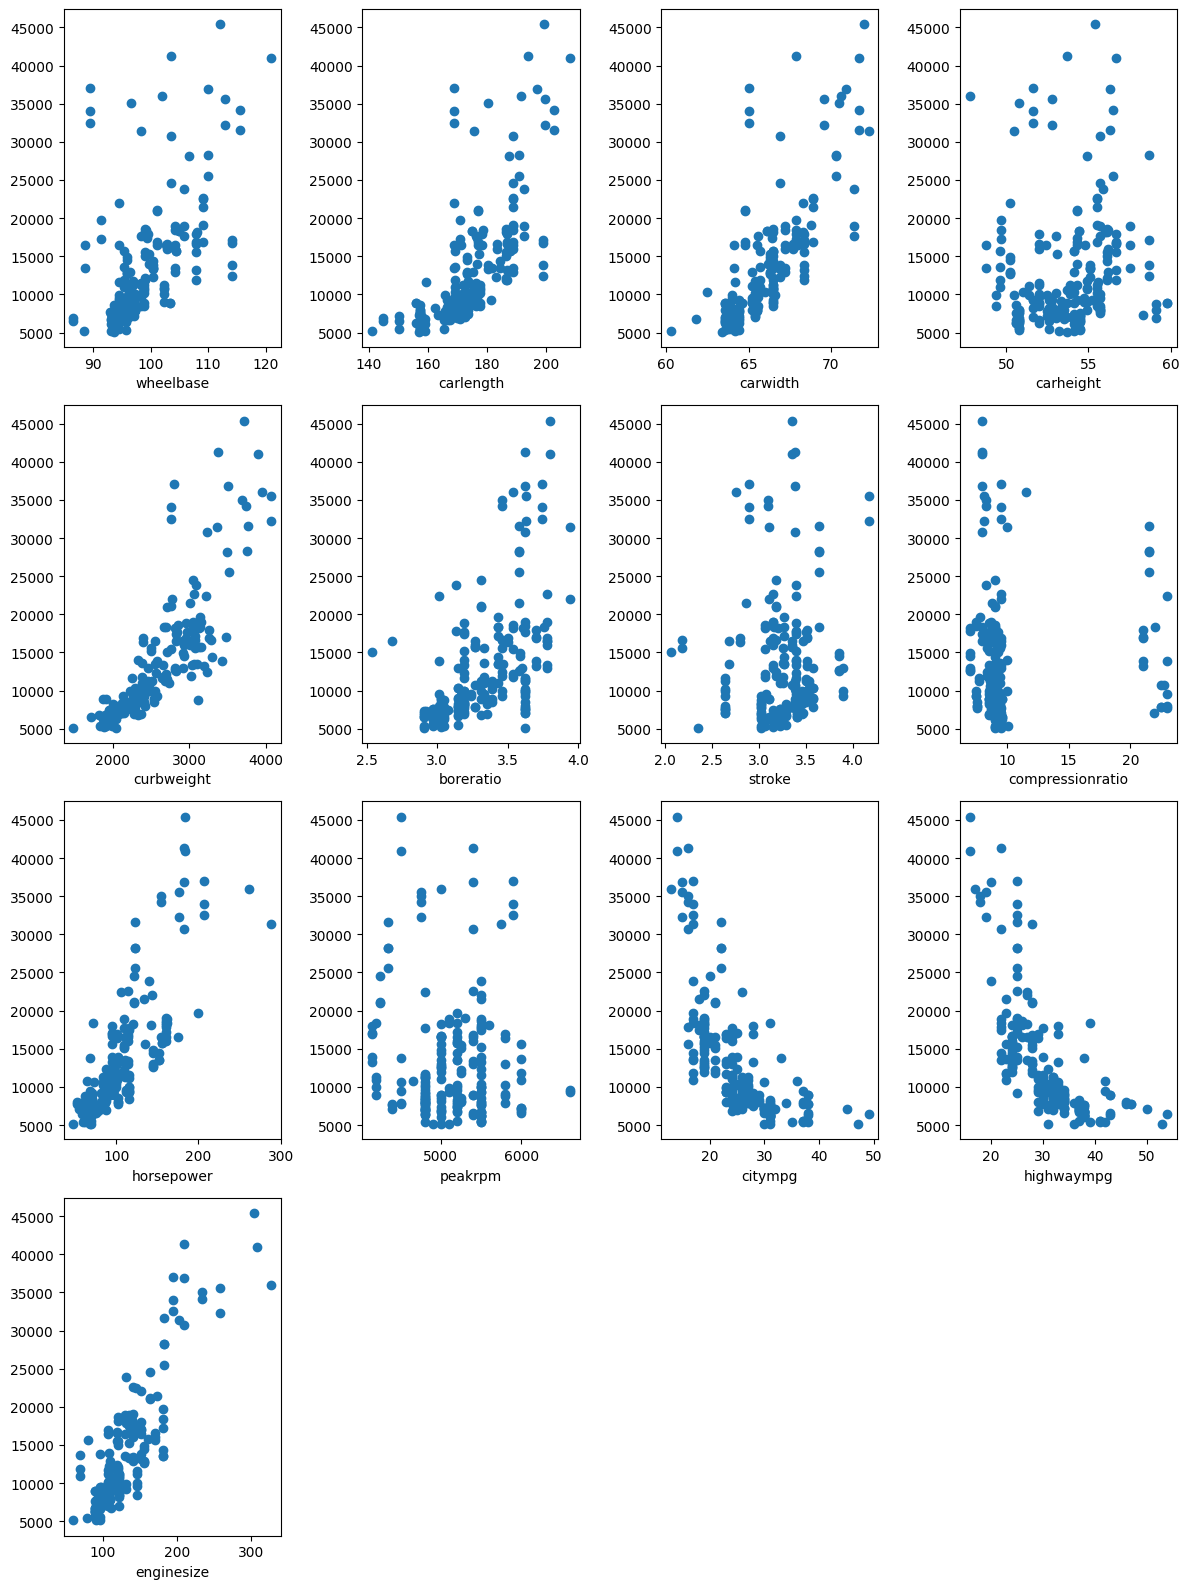

In [21]:
def plot_scatter(X,fig):
    plt.subplot(4,4,fig)   
    plt.scatter(x = X ,y = 'price', data = df)
    plt.xlabel(X)

   
plt.figure(figsize=(12, 16))
plot_scatter('wheelbase', 1)
plot_scatter('carlength', 2)
plot_scatter('carwidth', 3)
plot_scatter('carheight', 4)
plot_scatter('curbweight', 5)
plot_scatter('boreratio', 6)
plot_scatter('stroke', 7)
plot_scatter('compressionratio', 8)
plot_scatter('horsepower', 9)
plot_scatter('peakrpm', 10)
plot_scatter('citympg', 11)
plot_scatter('highwaympg', 12)
plot_scatter('enginesize', 13)
# 
plt.tight_layout()

    

In [22]:
df_final = df[['CarName','fueltype','carbody','aspiration','enginetype','cylindernumber','drivewheel'
              ,'wheelbase' ,'carlength','carwidth','curbweight','boreratio','horsepower','enginesize','price']]

In [23]:
df_copy = df_final

In [24]:
def encoding(x, df):
    enc = pd.get_dummies(df[x], dtype=np.int32)
    df = pd.concat([df, enc], axis=1)
    df.drop(x, axis = 1, inplace=True)
    return df

df_final = encoding('fueltype', df_final)
df_final = encoding('aspiration', df_final)
df_final = encoding('carbody', df_final)
df_final = encoding('drivewheel', df_final)
df_final = encoding('enginetype', df_final)
df_final = encoding('cylindernumber', df_final)
    

In [25]:
X = df_final.drop('price', axis = 1)
y = df_final['price']



In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.drop('CarName', axis = 1, inplace=True)
X_test.drop('CarName', axis = 1, inplace=True)

In [28]:
X_train_copy = X_train
X_test_copy = X_test

In [29]:
X_test

,wheelbase,carlength,carwidth,curbweight,boreratio,horsepower,enginesize,diesel,gas,std,...,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two
15,103.5,189.0,66.9,3230,3.62,182,209,0,1,1,...,0,0,0,0,0,0,1,0,0,0
9,99.5,178.2,67.9,3053,3.13,160,131,0,1,0,...,0,0,0,0,1,0,0,0,0,0
100,97.2,173.4,65.2,2302,3.33,97,120,0,1,1,...,0,0,0,0,0,1,0,0,0,0
132,99.1,186.6,66.5,2658,3.54,110,121,0,1,1,...,0,0,0,0,0,1,0,0,0,0
68,110.0,190.9,70.3,3750,3.58,123,183,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,95.3,169.0,65.7,2380,3.33,101,70,0,1,1,...,0,0,1,0,0,0,0,0,0,1
128,89.5,168.9,65.0,2800,3.74,207,194,0,1,1,...,1,0,0,0,0,0,1,0,0,0
76,93.7,157.3,64.4,1918,2.97,68,92,0,1,1,...,0,0,0,0,0,1,0,0,0,0
144,97.0,172.0,65.4,2385,3.62,82,108,0,1,1,...,1,0,0,0,0,1,0,0,0,0


In [30]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'boreratio',
       'horsepower', 'enginesize', 'diesel', 'gas', 'std', 'turbo',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd',
       'rwd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight',
       'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')

# Prediction without using scaling and any other adjustment factors

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.8443548176774914

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_hat))
print(mean_absolute_error(y_test, y_hat))

10783779.741053984
2300.0129860152374


# prediction after applying scaling factor to them

In [35]:
df_scaling = df_copy

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
X_test_scaled = scaler.transform(X_test)

In [39]:
lr.fit(X_train_scaled, y_train)
y_hat_scaled = lr.predict(X_test_scaled)

In [40]:
r2_score(y_test, y_hat)

0.8443548176774914

# after normalizing the data 

array([[<Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'diesel'}>,
        <Axes: title={'center': 'gas'}>, <Axes: title={'center': 'std'}>,
        <Axes: title={'center': 'turbo'}>,
        <Axes: title={'center': 'convertible'}>],
       [<Axes: title={'center': 'hardtop'}>,
        <Axes: title={'center': 'hatchback'}>,
        <Axes: title={'center': 'sedan'}>,
        <Axes: title={'center': 'wagon'}>,
        <Axes: title={'center': '4wd'}>, <Axes: title={'center': 'fwd'}>],
       [<Axes: title={'center': 'rwd'}>,
        <Axes: title={'center': 'dohc'}>,
        <Axes: title={'center': 'dohcv'}>, <Axes: title={'center': 'l'}>,
        <Axes: title={'center': 'ohc'}>,
      

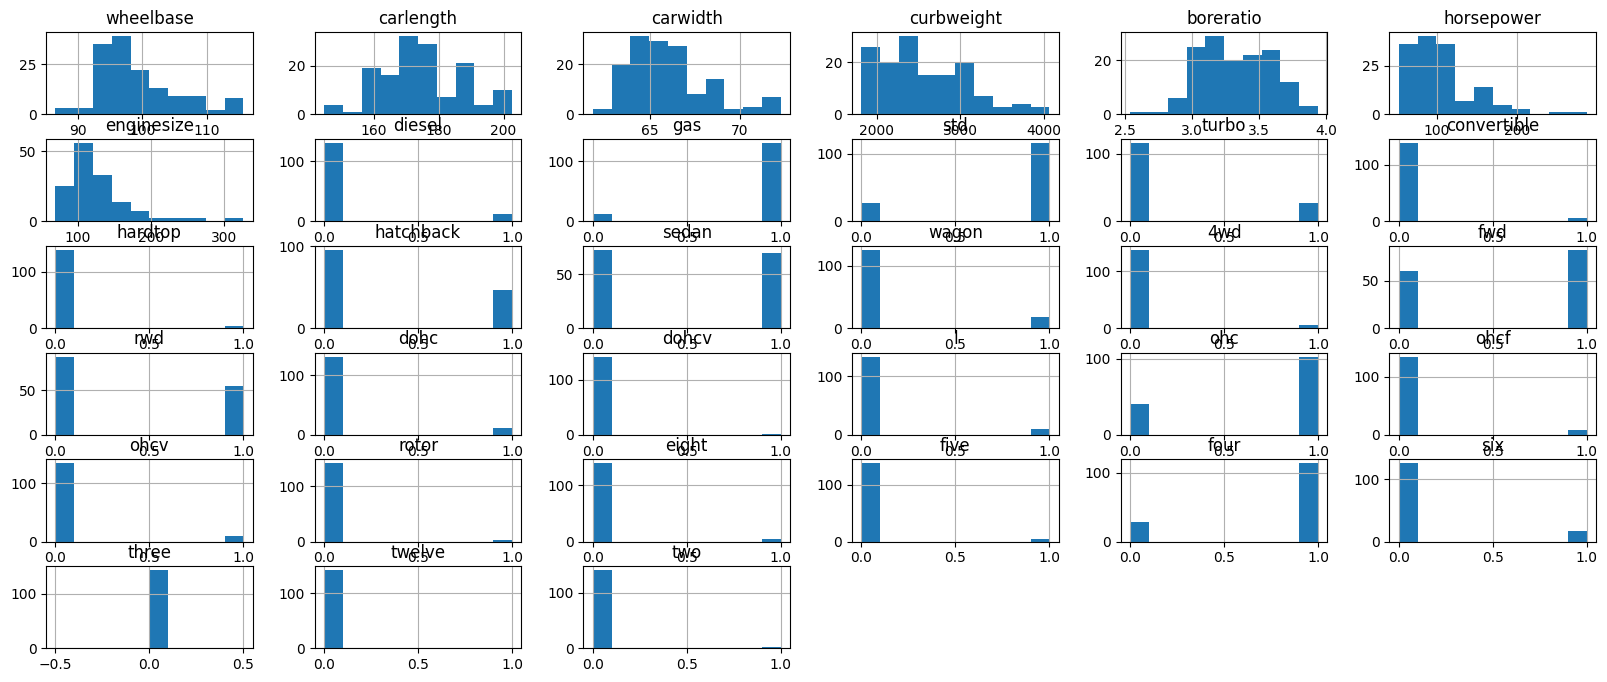

In [41]:
X_train.hist(figsize=(20,8))

In [42]:
X_train['wheelbase'] 

177    102.4
75     102.7
174    102.4
31      86.6
12     101.2
       ...  
106     99.2
14     103.5
92      94.5
179    102.9
102    100.4
Name: wheelbase, Length: 143, dtype: float64

In [43]:
X_train['wheelbase'] = np.log(X_train['wheelbase']  + 0.01)
X_train['horsepower'] = np.log(X_train['horsepower']+ 0.01)
X_train['enginesize'] = np.log(X_train['enginesize']+ 0.01)
X_train['enginesize'] = np.log(X_train['enginesize']+ 0.01)

In [44]:
X_test['wheelbase'] = np.log(X_test['wheelbase'] + 0.01)
X_test['horsepower'] = np.log(X_test['horsepower']+ 0.01)
X_test['enginesize'] = np.log(X_test['enginesize']+ 0.01)
X_test['enginesize'] = np.log(X_test['enginesize']+ 0.01)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train_scaled_min_max = scaler.fit_transform(X_train)
X_test_scaled_min_max = scaler.transform(X_test)


In [46]:
lr.fit(X_train_scaled_min_max, y_train)

LinearRegression()

In [47]:
y_hat_mm = lr.predict(X_test_scaled_min_max)

In [48]:
r2_score(y_test, y_hat_mm)

0.8055711837184267

Normalizing the columns caused decrease in accuracy

In [49]:
X_train_new = X_train_copy
X_test_new = X_test_copy

In [50]:
# X_train_new['wheelbase'] = np.log(X_train_new['wheelbase']  + 0.01)
X_train_new['horsepower'] = np.log(X_train_new['horsepower']+ 0.01)
X_train_new['enginesize'] = np.log(X_train_new['enginesize']+ 0.01)
X_train_new['enginesize'] = np.log(X_train_new['enginesize']+ 0.01)




# X_test_new['wheelbase'] = np.log(X_test_new['wheelbase'] + 0.01)
X_test_new['horsepower'] = np.log(X_test_new['horsepower']+ 0.01)
X_test_new['enginesize'] = np.log(X_test_new['enginesize']+ 0.01)
X_test_new['enginesize'] = np.log(X_test_new['enginesize']+ 0.01)




from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train_scaled_min_max = scaler.fit_transform(X_train_new)
X_test_scaled_min_max = scaler.transform(X_test_new)



lr.fit(X_train_scaled_min_max, y_train)

y_hat_mm = lr.predict(X_test_scaled_min_max)

r2_score(y_test, y_hat_mm)

0.809919002196337

In [51]:
# the Accuracy seem to decrease when i applied log transformation to convert the right skewed data to normalized form
# the Accuracy seem to decrease when i applied log transformation to convert the right skewed data to normalized form

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_test,y_hat_mm )


2515.3183192062475

In [54]:
mean_squared_error(y_test,y_hat_mm )

13169643.818638379

In [55]:
np.sqrt(mean_squared_error(y_test,y_hat_mm ))

3629.0003883491636